## F1000W - Stephan's Quintet - skysub

Author: Karl Gordon

Last modified: 3 Aug 2022

### Variables controling processing and display

In [1]:
filter = "F1000W"
fwhm = 2.9
exclude_above = None
ds9regions = None
exclude_delta = 1.0

crval = [338.9982251241355, 33.95839892526284]
# rotation = 63.0
# crval = None
rotation = None

tweakreg = False
align_to_gaia = False

matchbkg = False
scalebkg = True

# display range for images
drange_cal = [-0.1, 5.0]
dmap = "afmhot"  # same as ds9 bb

run_cc_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii, fits
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds-pub.stsci.edu"

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image
from helpers.miri_clean import make_sky
from helpers.miri_helpers import miri_image3

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


## Make a sky and subtract it

In [8]:
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_wcs_cal.fits")
simage = make_sky(miri_cal_files, exclude_above=exclude_above, ds9regions=ds9regions, 
                  exclude_delta=exclude_delta, scalebkg=scalebkg)

processing ./F1000W/stage2/jw02732002002_02103_00001_mirimage_fixed_wcs_cal.fits
median sky = 17.205751419067383
processing ./F1000W/stage2/jw02732002002_02103_00006_mirimage_fixed_wcs_cal.fits
median sky = 17.265525817871094
processing ./F1000W/stage2/jw02732002002_02103_00003_mirimage_fixed_wcs_cal.fits
median sky = 17.248512268066406
processing ./F1000W/stage2/jw02732006002_02103_00002_mirimage_fixed_wcs_cal.fits
median sky = 14.931446075439453
processing ./F1000W/stage2/jw02732002002_02103_00008_mirimage_fixed_wcs_cal.fits
median sky = 17.259376525878906
processing ./F1000W/stage2/jw02732002002_02103_00005_mirimage_fixed_wcs_cal.fits
median sky = 17.26675033569336
processing ./F1000W/stage2/jw02732002002_02103_00002_mirimage_fixed_wcs_cal.fits
median sky = 17.245561599731445
processing ./F1000W/stage2/jw02732006002_02103_00005_mirimage_fixed_wcs_cal.fits
median sky = 14.943730354309082
processing ./F1000W/stage2/jw02732006001_02103_00001_mirimage_fixed_wcs_cal.fits
median sky = 14.

2022-08-04 11:02:35,567 - stpipe - WARNING - /user/kgordon/anaconda3/envs/jwstdev/lib/python3.10/site-packages/astropy/stats/sigma_clipping.py:348: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  warnings.warn('Input data contains invalid values (NaNs or '



31 16.08168613910675


2022-08-04 11:02:37,400 - stpipe - WARNING - /user/kgordon/anaconda3/envs/jwstdev/lib/python3.10/site-packages/astropy/stats/sigma_clipping.py:957: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(data_clipped, axis=axis)

2022-08-04 11:02:38,695 - stpipe - WARNING - /user/kgordon/anaconda3/envs/jwstdev/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,

2022-08-04 11:02:39,265 - stpipe - WARNING - /user/kgordon/anaconda3/envs/jwstdev/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



./F1000W/stage2/jw02732002002_02103_00001_mirimage_fixed_wcs_cal.fits -1.1209944486618042
./F1000W/stage2/jw02732002002_02103_00006_mirimage_fixed_wcs_cal.fits -1.1807688474655151
./F1000W/stage2/jw02732002002_02103_00003_mirimage_fixed_wcs_cal.fits -1.1637552976608276
./F1000W/stage2/jw02732006002_02103_00002_mirimage_fixed_wcs_cal.fits 1.1533108949661255
./F1000W/stage2/jw02732002002_02103_00008_mirimage_fixed_wcs_cal.fits -1.1746195554733276
./F1000W/stage2/jw02732002002_02103_00005_mirimage_fixed_wcs_cal.fits -1.1819933652877808
./F1000W/stage2/jw02732002002_02103_00002_mirimage_fixed_wcs_cal.fits -1.1608046293258667
./F1000W/stage2/jw02732006002_02103_00005_mirimage_fixed_wcs_cal.fits 1.1410266160964966
./F1000W/stage2/jw02732006001_02103_00001_mirimage_fixed_wcs_cal.fits 1.2115803956985474
./F1000W/stage2/jw02732002001_02103_00003_mirimage_fixed_wcs_cal.fits -1.1632899045944214
./F1000W/stage2/jw02732002002_02103_00007_mirimage_fixed_wcs_cal.fits -1.1730250120162964
./F1000W/stag

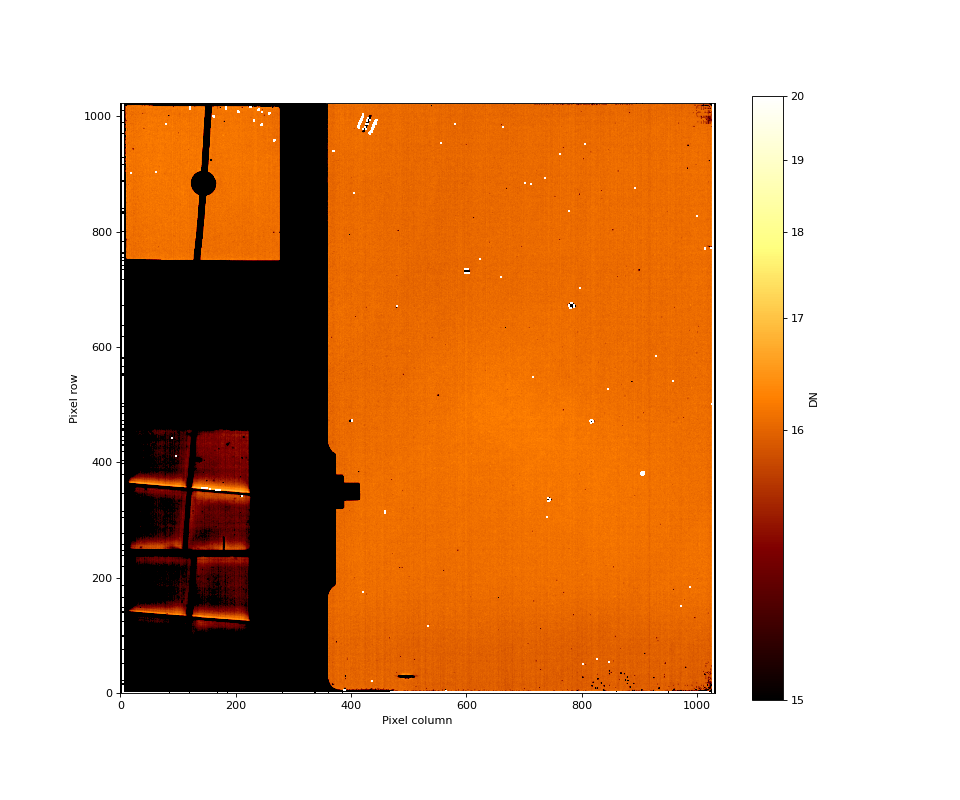

In [9]:
show_image(simage, 15, 20, dmap=dmap)
fits.writeto(f"./{filter}/stage3/{filter}_sky.fits", simage, overwrite=True)

### rerun CALWEBB_IMAGE3 with the new cleaned files

In [10]:
if run_cc_image3:
    miri_cccal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_wcs_skysub_cal.fits")
    output_dir = f"./{filter}/stage3/"
    print(miri_cccal_files)

    if rotation is not None:
        miri_asn_name = f'miri_{filter}_stage3_nirproj_asn_skysub'
    else: 
        miri_asn_name = f'miri_{filter}_stage3_asn_skysub'    
    miri_asn = asn_from_list.asn_from_list(miri_cccal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

    miri_asn_file = f'{miri_asn_name}.json'
    with open(miri_asn_file, 'w') as outfile:
        name, serialized = miri_asn.dump(format='json')
        outfile.write(serialized)

['./F1000W/stage2/jw02732006002_02103_00008_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732006001_02103_00006_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732002002_02103_00005_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732002001_02103_00005_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732006001_02103_00007_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732002002_02103_00002_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732002001_02103_00002_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732002001_02103_00004_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732002001_02103_00007_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732006001_02103_00005_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732002001_02103_00008_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732002001_02103_00001_mirimage_fixed_wcs_skysub_cal.fits', './F1000W/stage2/jw02732006002_02103_00

In [11]:
if run_cc_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg,
                crval=crval, rotation=rotation,
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-08-04 11:03:20,422 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-08-04 11:03:20,422 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-04 11:03:20,423 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-08-04 11:03:20,424 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-08-04 11:03:21,134 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-04 11:03:21,135 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-08-04 11:03:27,961 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-08-04 11:03:27,963 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.9, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-08-04 11:04:26,758 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 11:04:27,566 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 11:04:28,483 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 11:04:29,374 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 11:04:30,302 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 11:04:31,196 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 11:04:32,090 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 11:04:32,971 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2132, 2488)
2022-08-04 11:04:33,847 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (102

2022-08-04 11:04:59,588 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732002001_02103_00001_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-08-04 11:05:00,718 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006002_02103_00003_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-08-04 11:05:01,755 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006001_02103_00003_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-08-04 11:05:02,744 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006001_02103_00004_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-08-04 11:05:03,778 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732002002_02103_00001_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-08-04 11:05:04,773 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006002_02103_00006_mir

2022-08-04 11:05:53,609 - stpipe.Image3Pipeline.resample - INFO - Resampling var_rnoise
2022-08-04 11:05:54,240 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:05:55,254 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:05:56,296 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:05:57,385 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:05:58,453 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:05:59,507 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:06:00,596 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:06:01,678 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:06:02,757 - stpipe.Image3Pipeline.resample - INFO 

2022-08-04 11:07:12,937 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:13,996 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:15,000 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:16,005 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:17,036 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:18,097 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:19,123 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:20,179 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:21,191 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2149, 2508)
2022-08-04 11:07:22,213 - stpipe.Image3Pipelin

In [12]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_mosaic = datamodels.open(miri_mosaic_file)

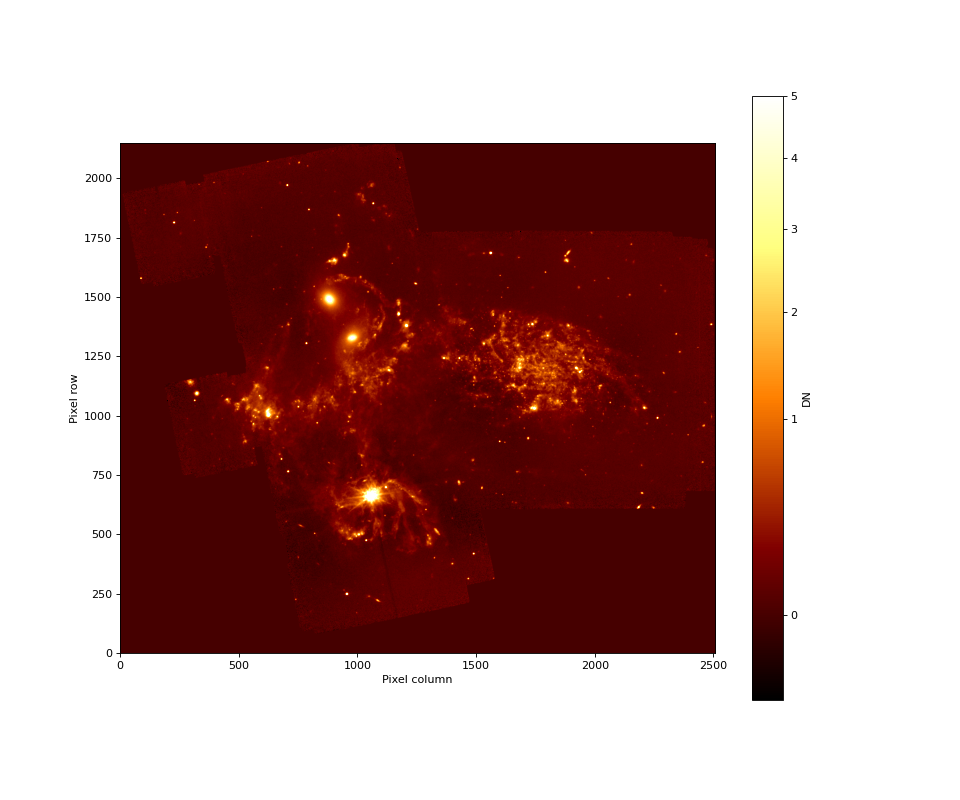

In [13]:
drange = drange_cal
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)